### Manish Tripathi
### PGID:12010079

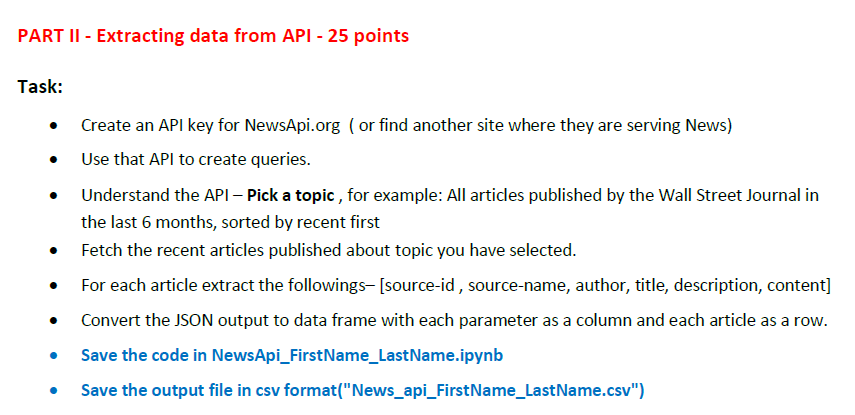

#### The Objective of the assignment is to fetch News using API from https://newsapi.org/

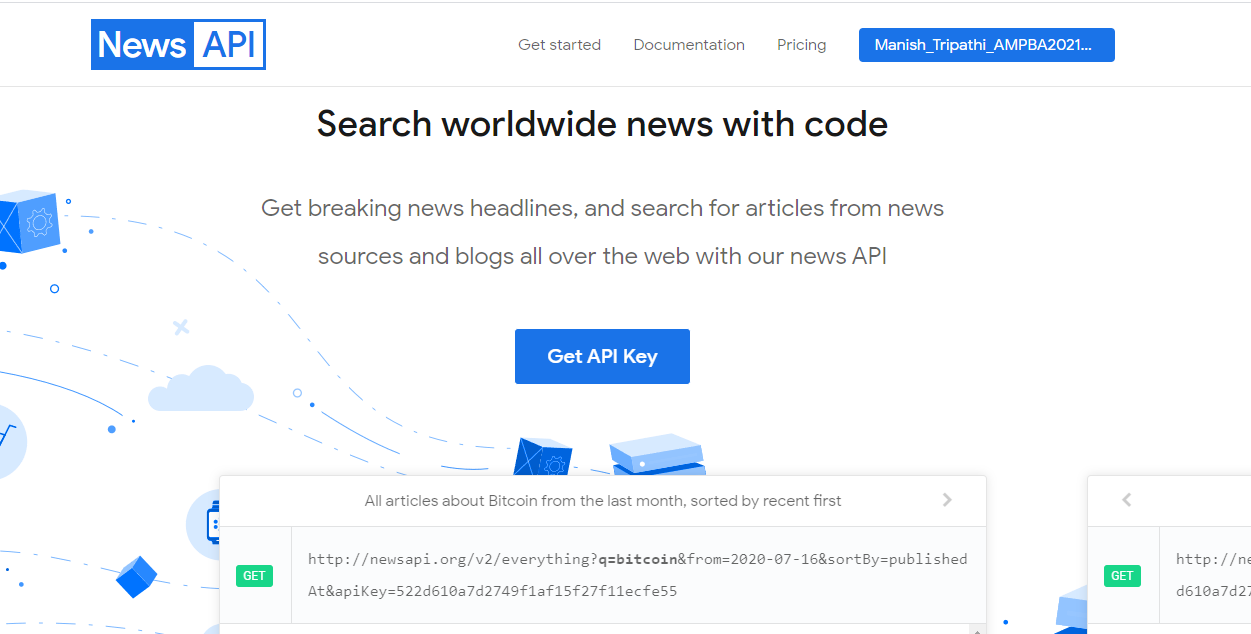

#### The output should be a dafaframe that contains source-id , source-name, author, title, description and content for each news article. Sample output below:

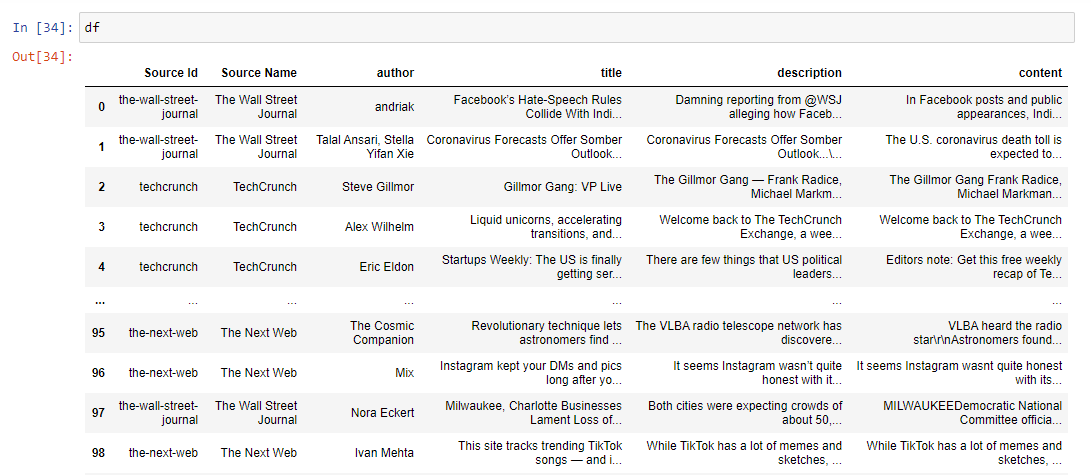

In [1]:
import requests             # imports the requests library
import json                 # imports the json library
import pandas as pd         # imports the pandas library with an alias as pd
import csv                  # imports the CSV library
import os                   # imports the os library

In [2]:
endpoint = "https://newsapi.org/v2/everything?language=en&domains=techcrunch.com,thenextweb.com,wsj.com&pageSize=100&apiKey=522d610a7d2749f1af15f27f11ecfe55"

# Here we have defined a varibale "endpoint" that contains the link to the API from where we will fetch data
# Over here we are taking news from three domains viz. techcrunch.com, thenextweb.com and wsj.com
# Also we have defined the pagesize as 100 so that we get 100 articles per page and we have defined the language of the Articles as English

res = requests.get(endpoint)

# Defined a variable "res" which contains the data that has been pulled from the server for the link defined above using requests.get()

In [3]:
if res.ok is False:

# Here we conditionally check if the link is working fine.
# Whenever we make a request to a specified URL through Python, it returns a response object.
# response.ok returns "True" if status_code is less than 400, otherwise if returns False.
# In case the response is False we want to know what the response is.
    
    print("\n We have Error {}:".format(res.status_code))
    # Using the response.status_code we print the status code of the error
    
    print(res.json()['error'])
    # Here we are printing the error that we have recieved.
    
else:
    
# if the link is working fine
    data = res.json()
    # This returns a json object we can iterate over.
    # Over here the type of data is a Dictionary, u=with three Keys "['status', 'totalResults', 'articles']"
    # The data regarding the articles is stored in "articles" Key
    articles = data["articles"]
    # Defined a new variable articles in which we have stored the value of "articles" in form of list of dictionaries
    df = pd.DataFrame(articles)
    # Using the pandas DataFrame() function we have converted the above list into a Dataframe
    
    # As the source field contains dictonary of dictonaries we are accessing the id field and name field to extract the two and 
    # and stor in new Columns
    df["Source Id"] = df["source"].apply(pd.Series)["id"]
    df["Source Name"]= df["source"].apply(pd.Series)["name"]
    
    # Here we have defined the coulmns that we want
    column_titles = ["Source Id","Source Name", "author", "title", "description", "content"]
    # we have reindexed the dataframe ont the basis of the above columns saved it again as df
    df=df.reindex(columns= column_titles)
    

In [4]:
df

,Source Id,Source Name,author,title,description,content
0,the-next-web,The Next Web,Napier Lopez,Meta filed a patent for ‘3D conversations’ — a...,Ever since Star Wars first showed space wizard...,Ever since Star Wars first showed space wizard...
1,techcrunch,TechCrunch,Natasha Lomas,TikTok pushes bundle of teen safety measures i...,TikTok is making a promotional push in Europe ...,TikTok is making a promotional push in Europe ...
2,techcrunch,TechCrunch,Devin Coldewey,‘Elden Ring’: Wonder and terror abound in 2022...,"How to talk about Elden Ring, probably the mos...","How to talk about Elden Ring, probably the mos..."
3,the-next-web,The Next Web,Ioanna Lykiardopoulou,Court allows Waymo to keep ‘incident’ data und...,Being a passenger in a self-driving taxi sound...,Being a passenger in a self-driving taxi sound...
4,techcrunch,TechCrunch,Alex Wilhelm,"Nu shares slump on Q4 results, a canary to sti...",What do Nu's earnings – and the resulting inve...,"Nu, parent to the well-known Latin American ne..."
...,...,...,...,...,...,...
95,techcrunch,TechCrunch,Jordan Crook,The Found podcast is coming to you live in Mar...,The early bird gets the worm. And what is the ...,The early bird gets the worm. And what is the ...
96,techcrunch,TechCrunch,Natasha Lomas,Zenjob nabs $50M for its student job matching ...,More money for casual job-matching in Europe: ...,More money for casual job-matching in Europe: ...
97,techcrunch,TechCrunch,Natasha Lomas,Zenjob nabs $50M for its student job matching ...,More money for casual job-matching in Europe: ...,More money for casual job-matching in Europe: ...
98,techcrunch,TechCrunch,Natasha Mascarenhas,Clearco co-founder Andrew D’Souza steps back a...,Clearco co-founder Andrew D’Souza tells TechCr...,Clearco co-founder Andrew DSouza tells TechCru...


In [5]:
df.to_csv("News_api_Manish_Tripathi.csv", index = False)
print ("Your file is stored at :", os.getcwd())

Your file is stored at : C:\Users\PankhuriManish\Desktop
